In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
All_stats=pd.read_csv('deaths_and_stats.csv')
Cities=All_stats[['State','City','PD']]
Deaths=All_stats.iloc[:,3:10]
Deaths.rename(columns={Deaths.columns[0]:'Black_killed',Deaths.columns[1]:'Hispanic_killed',\
                       Deaths.columns[2]:'NativeAm_killed',Deaths.columns[3]:'Asian_killed',\
                       Deaths.columns[4]:'PacificIsl_killed',Deaths.columns[5]:'White_killed',\
                      Deaths.columns[6]:'Unkown_killed'},inplace=True)
Population=All_stats.iloc[:,10:20]
Crimes=All_stats.iloc[:,20:]

In [3]:
Deaths.fillna(0,inplace=True)
# Deaths=Deaths.append(Deaths.sum(axis=0).rename('Total'))
Deaths['Total_killed']=Deaths.sum(axis=1)

dea_cols=list(Deaths.columns)
for i in range(len(Deaths.columns)-1):
    new_name=dea_cols[i]+'_percentage'
    Deaths[new_name]=100*Deaths.iloc[:,i]/Deaths['Total_killed']
Deaths.fillna(0,inplace=True)

In [4]:
pop_cols=list(Population.columns)
for i in range(len(Population.columns)-1):
    Population.iloc[:,i]=pd.to_numeric(Population.iloc[:,i].str.replace(',',''))
    if i>0:
        new_name=pop_cols[i]+'_percentage'
        Population[new_name]=100*Population.iloc[:,i]/Population['Total']
Deaths['Total_killed_per_population']=Deaths['Total_killed']/Population['Total']

In [5]:
Cities.head()

,State,City,PD
0,New Mexico,Albuquerque,Albuquerque Police Department
1,California,Anaheim,Anaheim Police Department
2,Alaska,Anchorage,Anchorage Police Department
3,Texas,Arlington,Arlington Police Department
4,Georgia,Atlanta,Atlanta Police Department


In [6]:
Deaths.tail()

,Black_killed,Hispanic_killed,NativeAm_killed,Asian_killed,PacificIsl_killed,White_killed,Unkown_killed,Total_killed,Black_killed_percentage,Hispanic_killed_percentage,NativeAm_killed_percentage,Asian_killed_percentage,PacificIsl_killed_percentage,White_killed_percentage,Unkown_killed_percentage,Total_killed_per_population
95,2.0,10.0,0.0,0.0,0.0,10.0,6.0,28.0,7.142857,35.714286,0.0,0.000000,0.0,35.714286,21.428571,0.000054
96,7.0,4.0,0.0,1.0,0.0,14.0,1.0,27.0,25.925926,14.814815,0.0,3.703704,0.0,51.851852,3.703704,0.000069
97,3.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,50.000000,0.000000,0.0,0.000000,0.0,33.333333,16.666667,0.000014
98,1.0,2.0,0.0,0.0,0.0,10.0,0.0,13.0,7.692308,15.384615,0.0,0.000000,0.0,76.923077,0.000000,0.000034
99,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,100.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000013


In [7]:
Crimes.head()

,Murder and\nnonnegligent manslaughter,Violent crimes 2013 (if reported by agency),Violent crimes 2014 (if reported by agency),Violent crimes 2015 (if reported by agency),Violent crimes 2016 (if reported by agency),Violent crimes 2017 (if reported by agency),Violent crimes 2018 (if reported by agency),2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests
0,30,4325.0,4934.0,5406.0,6245.0,7686.0,7646.0,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0
1,14,1130.0,1101.0,1271.0,1209.0,1253.0,1192.0,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0
2,12,2435.0,2605.0,3226.0,3422.0,3564.0,3824.0,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0
3,13,1837.0,1854.0,1946.0,2188.0,NaN,1784.0,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0
4,93,5517.0,5577.0,5203.0,5121.0,4504.0,3814.0,30505.0,26958.0,NaN,22161.0,22581.0,NaN


---

# How different races are affected 

## First, we look at how biased are police killings. We look at relationship between groups killed by the police and their share of overall population.

Black people are killed at rates higher than their share of population.


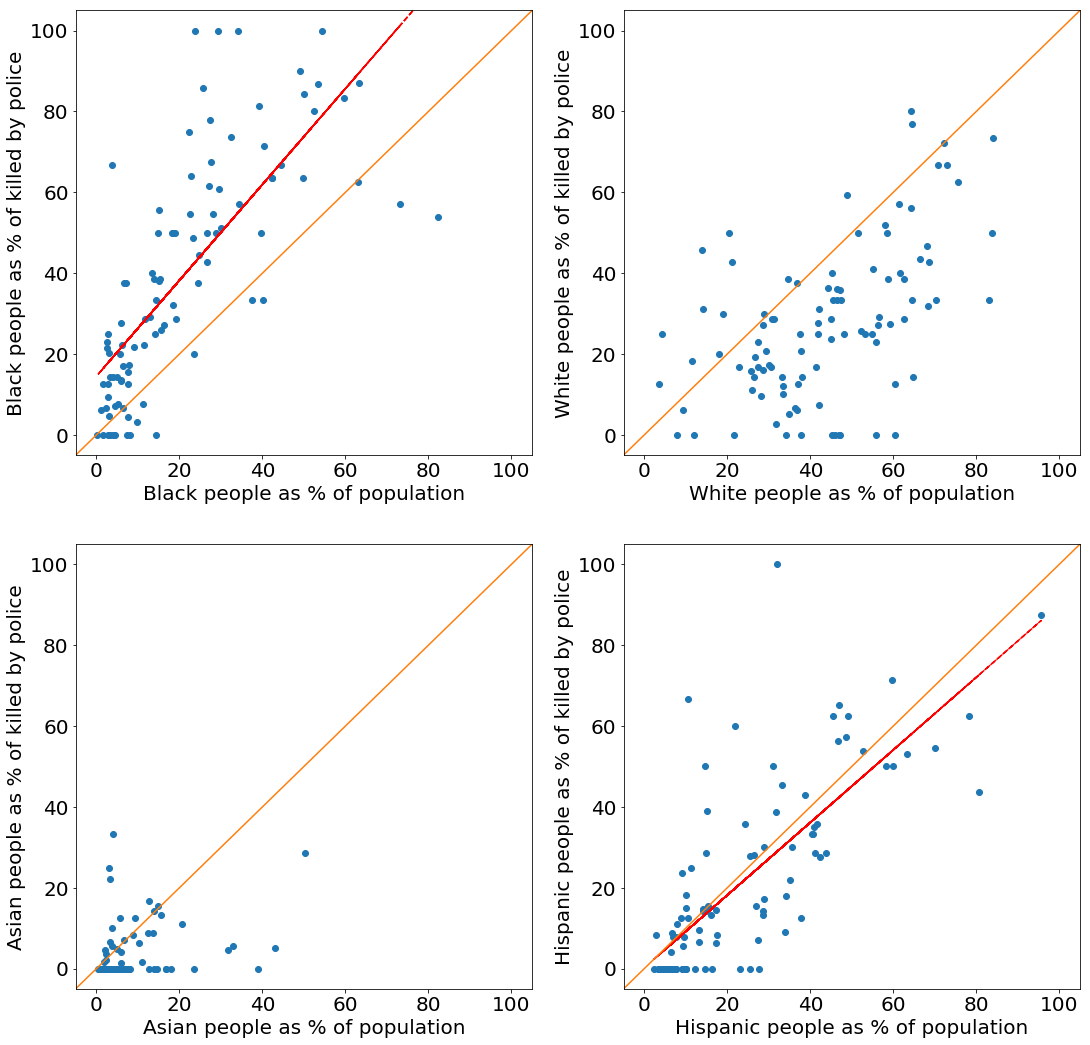

In [10]:
fig=plt.figure(figsize=(18,18))
for i in range(4):
    pplc=names[i]
    ppl_perc=Population[pplc+'_percentage']
    ppl_killed=Deaths[pplc+'_killed_percentage']
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(ppl_perc,ppl_killed,'o')
    ax.set_xlabel(pplc+' people as % of population',fontsize=20)
    ax.set_ylabel(pplc+' people as % of killed by police',fontsize=20)
    slope, intercept, r_value, p_value, std_err = linregress(np.array(list(ppl_perc)),np.array(list(ppl_killed)))
    if r_value>0.7:
        ax.plot(ppl_perc,slope*ppl_perc+intercept,'r--')    
        if slope>1 and intercept>0:
            print(pplc+' people are killed at rates higher than their share of population.')
    ax.plot(np.linspace(-10,110,20),np.linspace(-10,110,20))
    ax.set_xlim([-5,105])
    ax.set_ylim([-5,105])
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
plt.show()

And police killings per capita?

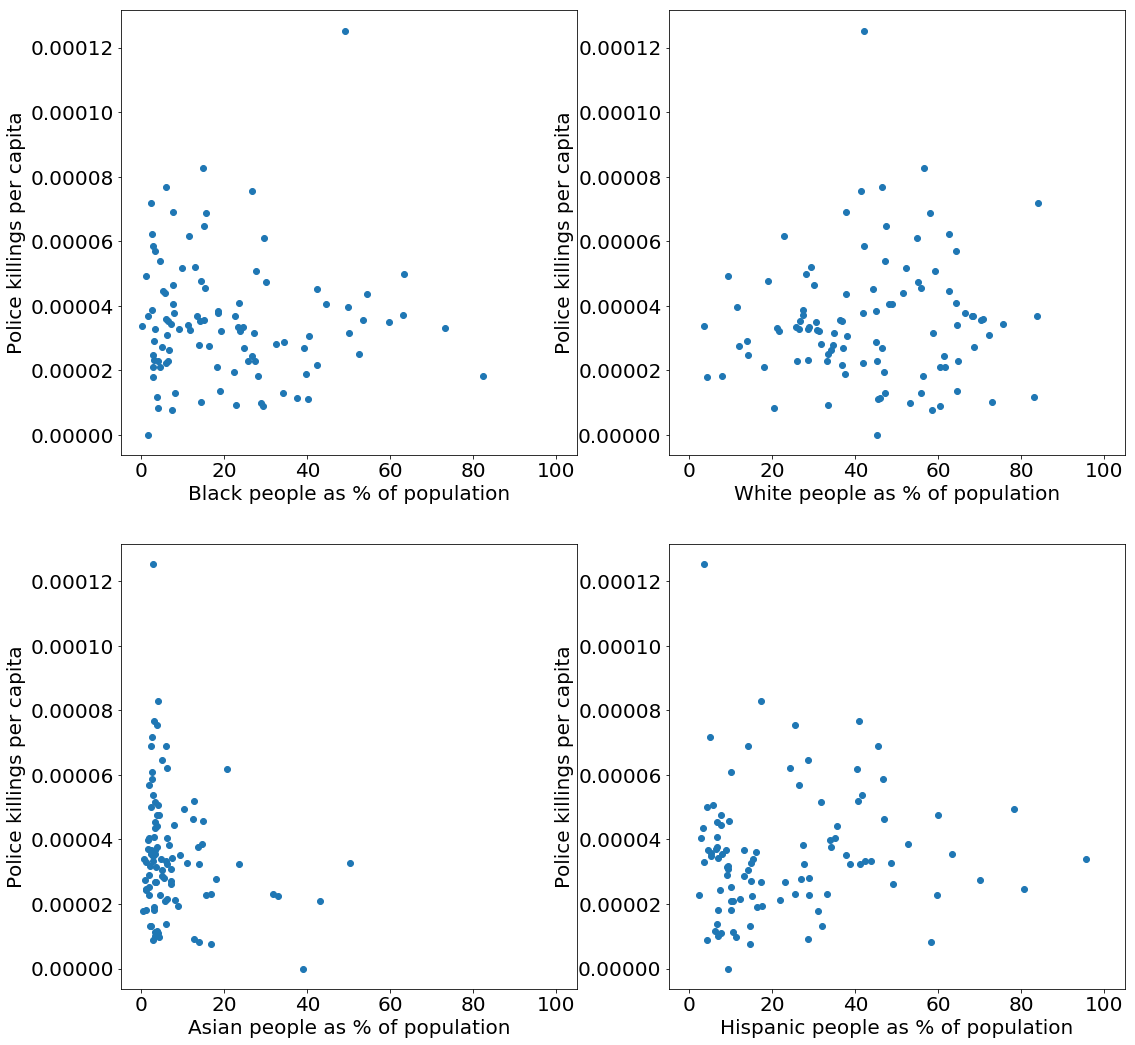

In [34]:
fig=plt.figure(figsize=(18,18))
ppl_killed=Deaths['Total_killed_per_population']
for i in range(4):
    pplc=names[i]
    ppl_perc=Population[pplc+'_percentage']
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(ppl_perc,ppl_killed,'o')
    ax.set_xlabel(pplc+' people as % of population',fontsize=20)
    ax.set_ylabel('Police killings per capita',fontsize=20)
    ax.set_xlim([-5,105])
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
plt.show()

----

## We can look which cities look most biased against one of the 4 racial groups chosen.

In [9]:
names=['Black','White','Asian','Hispanic']
Bias=pd.DataFrame()
for name in names:
    bias_name='Against_'+name.lower()
    Bias[bias_name]=Population[name+'_percentage']<Deaths[name+'_killed_percentage']
    Bias[bias_name+'_degree']=Deaths[name+'_killed_percentage']/Population[name+'_percentage']

In [28]:
for name in names:
    bias_name='Against_'+name.lower()+'_degree'
    Bias.sort_values(by=[bias_name],ascending=False,inplace=True)
    ind=Bias.index[0]
    print("City most biased against "+name+" people:")
    print("{}, {}".format(Cities['City'].iloc[ind],Cities['State'].iloc[ind]))
    print('Bias degree (%killed/%population): {}\n'.format(Bias[bias_name].iloc[0]))

City most biased against Black people:
Lincoln, Nebraska
Bias degree (%killed/%population): 18.053942633546452

City most biased against White people:
Hialeah, Florida
Bias degree (%killed/%population): 5.9055041530859

City most biased against Asian people:
Greensboro, North Carolina
Bias degree (%killed/%population): 8.392182491519623

City most biased against Hispanic people:
Buffalo, New York
Bias degree (%killed/%population): 6.33041413811064



This of course can be related to poverty and other factors, which we cannot analyze without another file.

---

## Next, let's look at crime statistics

In [6]:
for i in range(len(Crimes.index)):
    for j in range(1,7):
        if pd.isna(Crimes.iloc[i,j]):
            if j>1 and j<6:
                if not pd.isna(Crimes.iloc[i,j-1]) and not pd.isna(Crimes.iloc[i,j+1]):
                    Crimes.iloc[i,j]=(Crimes.iloc[i,j-1]+Crimes.iloc[i,j+1])/2
                elif not pd.isna(Crimes.iloc[i,j-1]):
                    Crimes.iloc[i,j]=Crimes.iloc[i,j-1]
                elif not pd.isna(Crimes.iloc[i,j+1]):
                    Crimes.iloc[i,j]=Crimes.iloc[i,j+1]
            elif j==1:
                Crimes.iloc[i,j]=Crimes.iloc[i,j+1]
            else:
                Crimes.iloc[i,j]=Crimes.iloc[i,j-1]
            
    for j in range(7,13):
        if pd.isna(Crimes.iloc[i,j]):
            if j>7 and j<12:
                if not pd.isna(Crimes.iloc[i,j-1]) and not pd.isna(Crimes.iloc[i,j+1]):
                    Crimes.iloc[i,j]=(Crimes.iloc[i,j-1]+Crimes.iloc[i,j+1])/2
                elif not pd.isna(Crimes.iloc[i,j-1]):
                    Crimes.iloc[i,j]=Crimes.iloc[i,j-1]
                elif not pd.isna(Crimes.iloc[i,j+1]):
                    Crimes.iloc[i,j]=Crimes.iloc[i,j+1]
            elif j==7:
                Crimes.iloc[i,j]=Crimes.iloc[i,j+1]
            else:
                Crimes.iloc[i,j]=Crimes.iloc[i,j-1]

In [7]:
Crimes['Total_violent_crimes']=Crimes.iloc[:,1:7].sum(axis=1)
Crimes['Total_arrests']=Crimes.iloc[:,7:13].sum(axis=1)

In [8]:
Crime_density=pd.DataFrame()
Crime_density=Crimes[['Total_violent_crimes','Total_arrests']]
Crime_density['Murders']=pd.to_numeric(Crimes.iloc[:,0])
Crime_density['Murders_per_population']=Crime_density['Murders']/Population['Total']
Crime_density['Violent_crimes_per_population']=Crime_density['Total_violent_crimes']/Population['Total']
Crime_density['Arrests_per_population']=Crime_density['Total_arrests']/Population['Total']
Crime_density['Murder_crime_percentage']=100*Crime_density['Murders']/Crime_density['Total_violent_crimes']
Crime_density.head()

c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Total_violent_crimes,Total_arrests,Murders,Murders_per_population,Violent_crimes_per_population,Arrests_per_population,Murder_crime_percentage
0,36242.0,138998.0,30,0.000055,0.066395,0.254644,0.082777
1,7156.0,52712.0,14,0.000042,0.021281,0.156757,0.195640
2,19076.0,87874.0,12,0.000041,0.065368,0.301118,0.062906
3,11595.0,76456.0,13,0.000036,0.031729,0.209217,0.112117
4,29736.0,149345.5,93,0.000221,0.070799,0.355582,0.312752


### First, let's plot crime vs total population

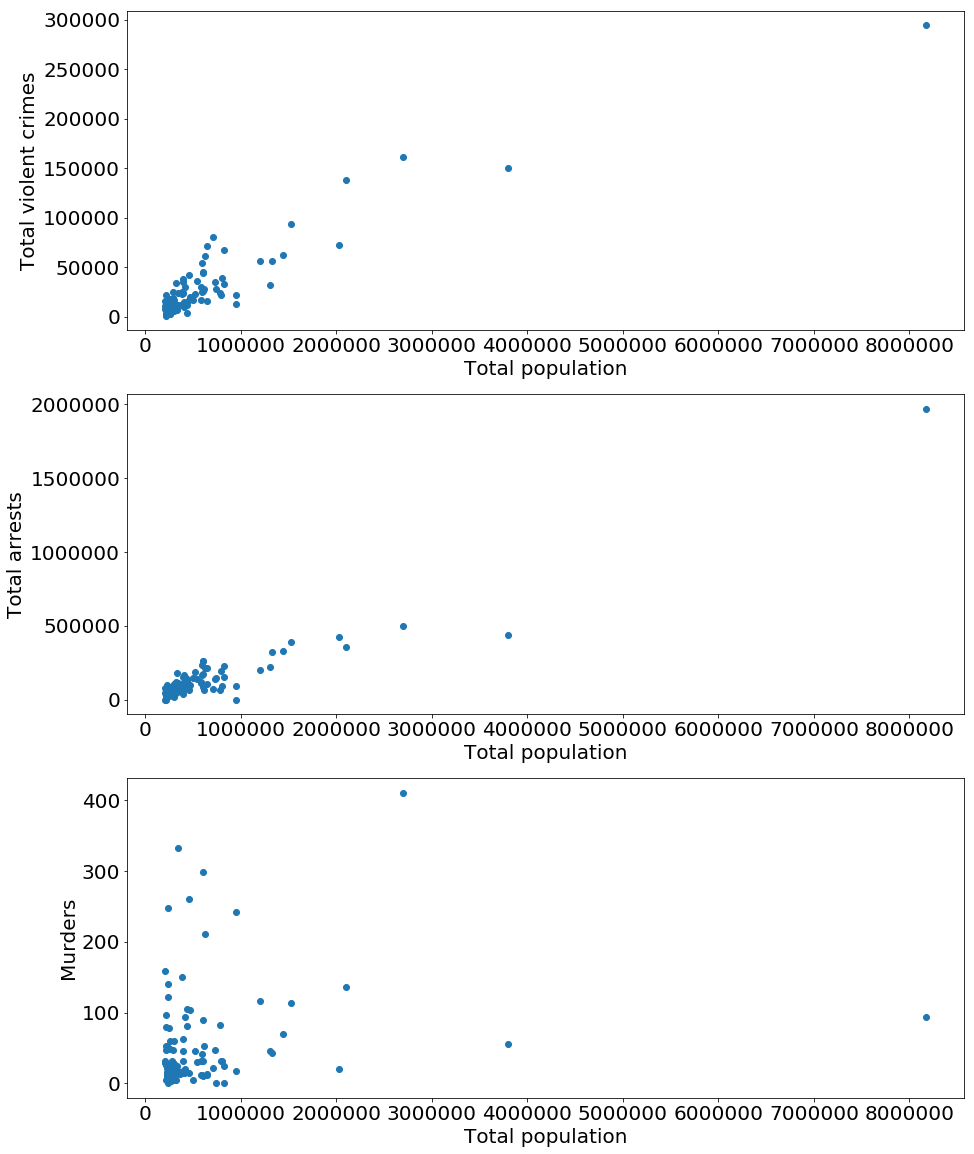

In [100]:
fig=plt.figure(figsize=(15,20))
pop=Population['Total']
for i in range(3):
    crime=Crime_density.iloc[:,i]
    ylabel=list(Crime_density.columns)[i].replace('_',' ')
    ax=fig.add_subplot(3,1,i+1)
    ax.plot(pop,crime,'o')
    ax.set_xlabel('Total population',fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20)
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
plt.show()

We expected a somewhat linear growth, which can indeed be seen in the case of violent crimes and total arrests. However, total number of murders seems not to be correlated well with total population number. What about per capita crimes? 

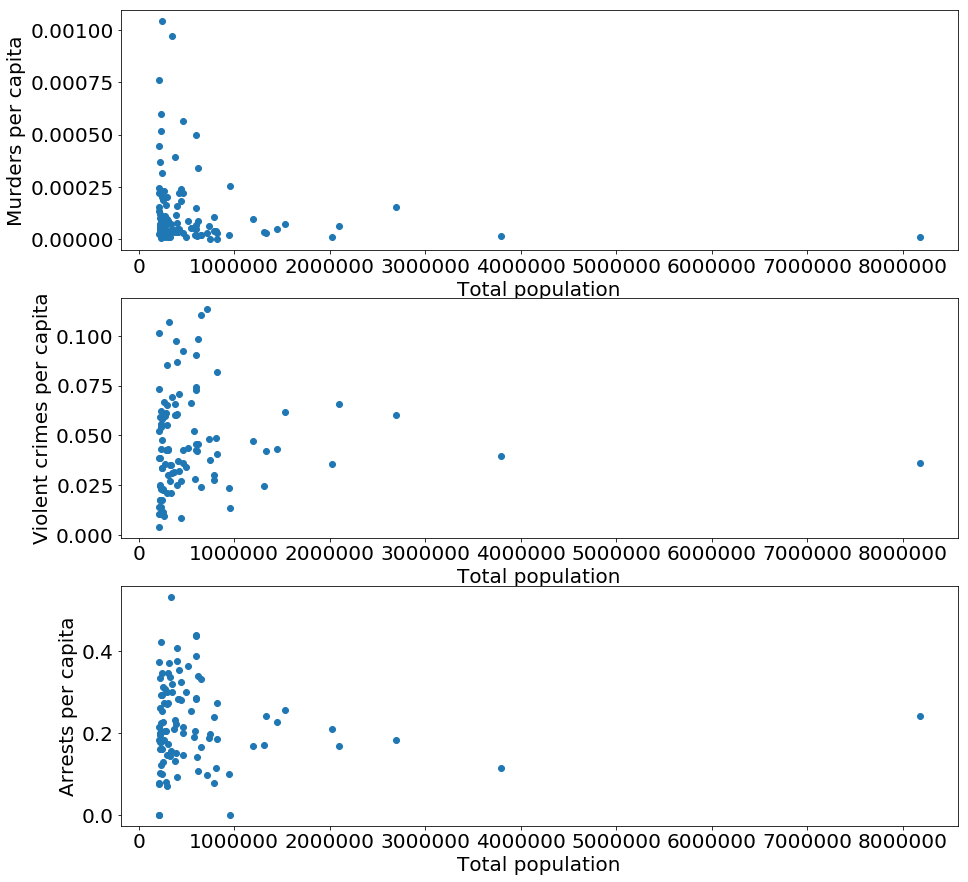

In [110]:
fig=plt.figure(figsize=(15,15))
pop=Population['Total']
for i in range(3):
    crime=Crime_density.iloc[:,i+3]
    ylabel=list(Crime_density.columns)[i+3].replace('_',' ').replace('population','capita')
    ax=fig.add_subplot(3,1,i+1)
    ax.plot(pop,crime,'o')
    ax.set_xlabel('Total population',fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20)
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
plt.show()

There is no clear relationship. Per capita arrests and violent crimes are pretty constant. We can also observe that in general bigger cities are safer on per capita basis, especially considering murder rates. But is the number of murders actually related to the total number of violent crimes or is it a special type of crime?

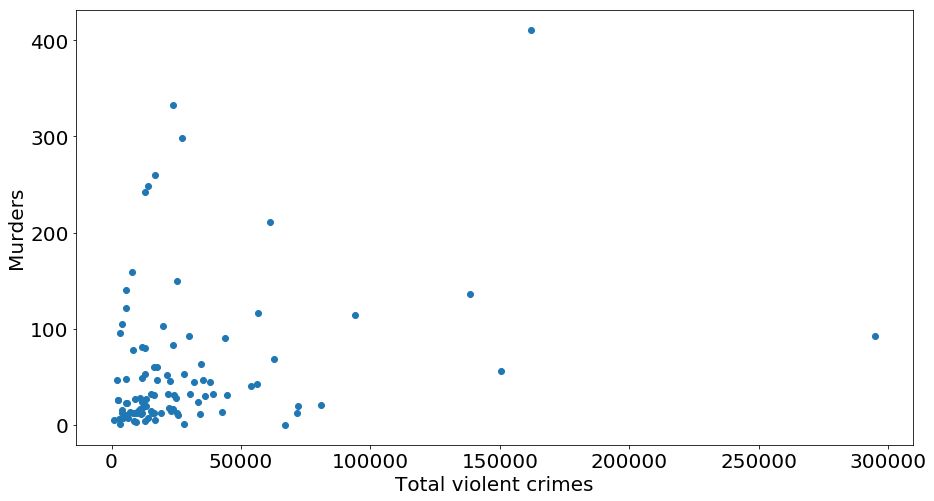

In [106]:
fig=plt.figure(figsize=(15,8))
xlabel=list(Crime_density.columns)[0].replace('_',' ')
ylabel=list(Crime_density.columns)[2].replace('_',' ')
ax=fig.add_subplot(1,1,1)
ax.plot(Crime_density.iloc[:,0],Crime_density.iloc[:,2],'o')
ax.set_xlabel(xlabel,fontsize=20)
ax.set_ylabel(ylabel,fontsize=20)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
plt.show()''

It doesn't seem to be very correlated. So how big percentage of all violent crime do murders consitute in diiferent cities?

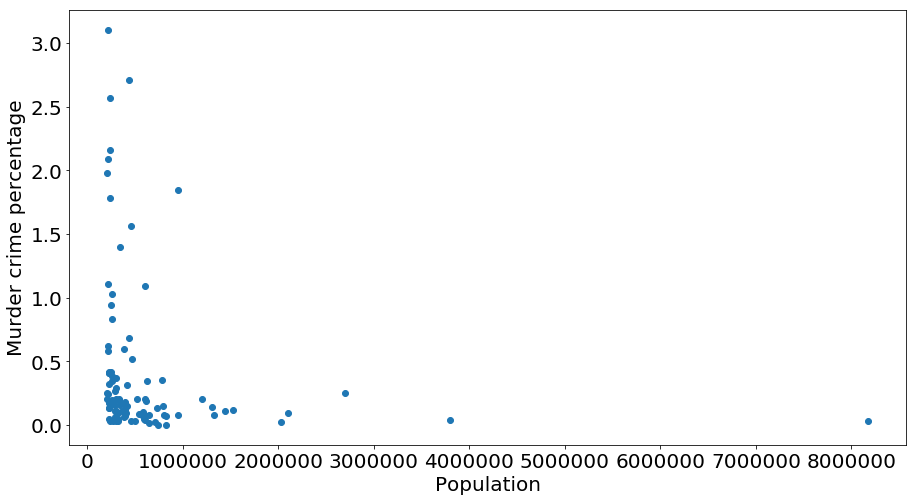

In [109]:
fig=plt.figure(figsize=(15,8))
xlabel='Population'
ylabel=list(Crime_density.columns)[-1].replace('_',' ')
ax=fig.add_subplot(1,1,1)
ax.plot(Population['Total'],Crime_density.iloc[:,-1],'o')
ax.set_xlabel(xlabel,fontsize=20)
ax.set_ylabel(ylabel,fontsize=20)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
plt.show()

### How about crime in relationship to racial composition of the population?

First, violent crimes

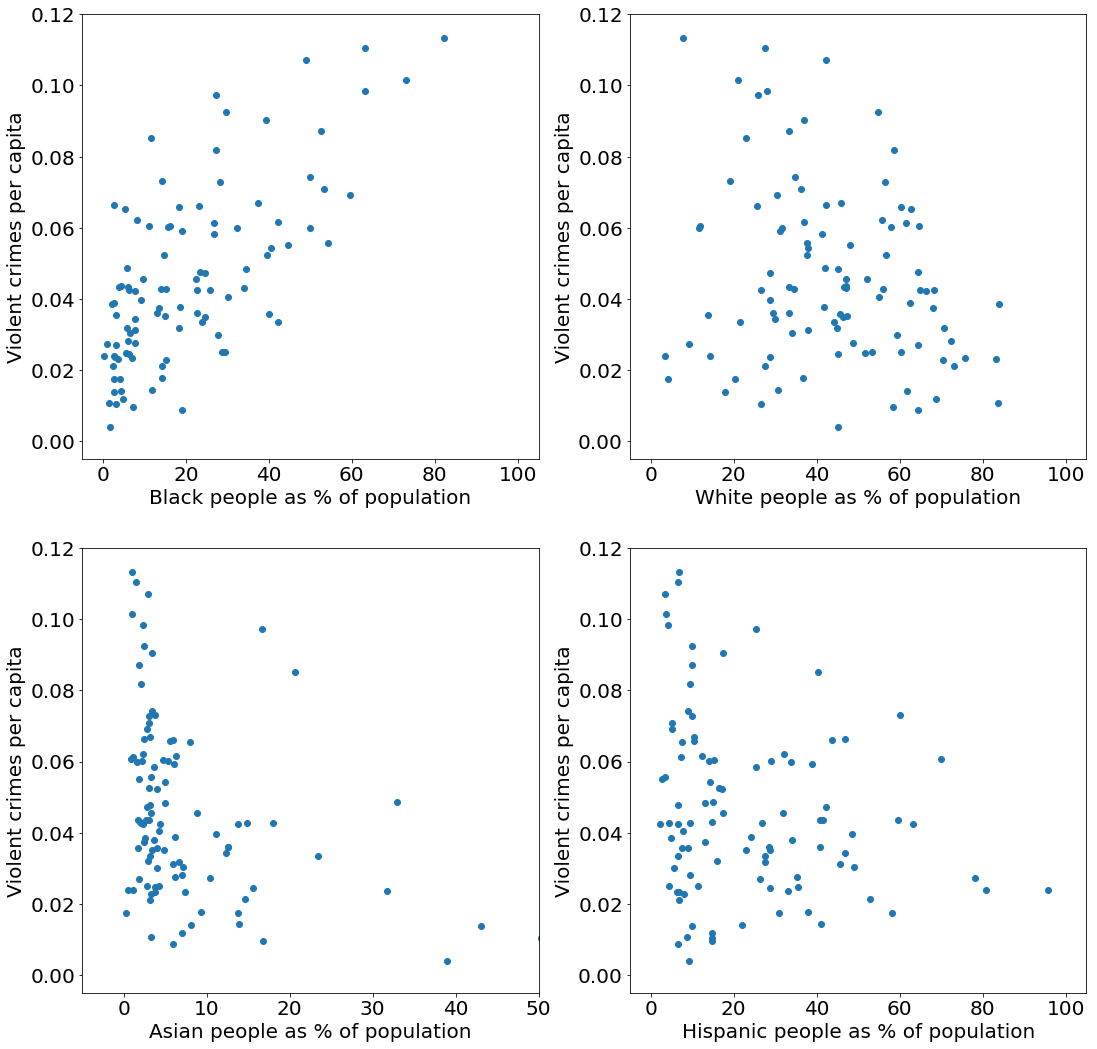

In [9]:
fig=plt.figure(figsize=(18,18))
for i in range(4):
    pplc=names[i]
    ppl_perc=Population[pplc+'_percentage']
    crimes=Crime_density['Violent_crimes_per_population']
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(ppl_perc,crimes,'o')
    ax.set_xlabel(pplc+' people as % of population',fontsize=20)
    ax.set_ylabel('Violent crimes per capita',fontsize=20)
    ax.set_xlim([-5,105])
    ax.set_ylim([-0.005,0.12])
    if i==2:
        ax.set_xlim([-5,50])
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
plt.show()

Then murders

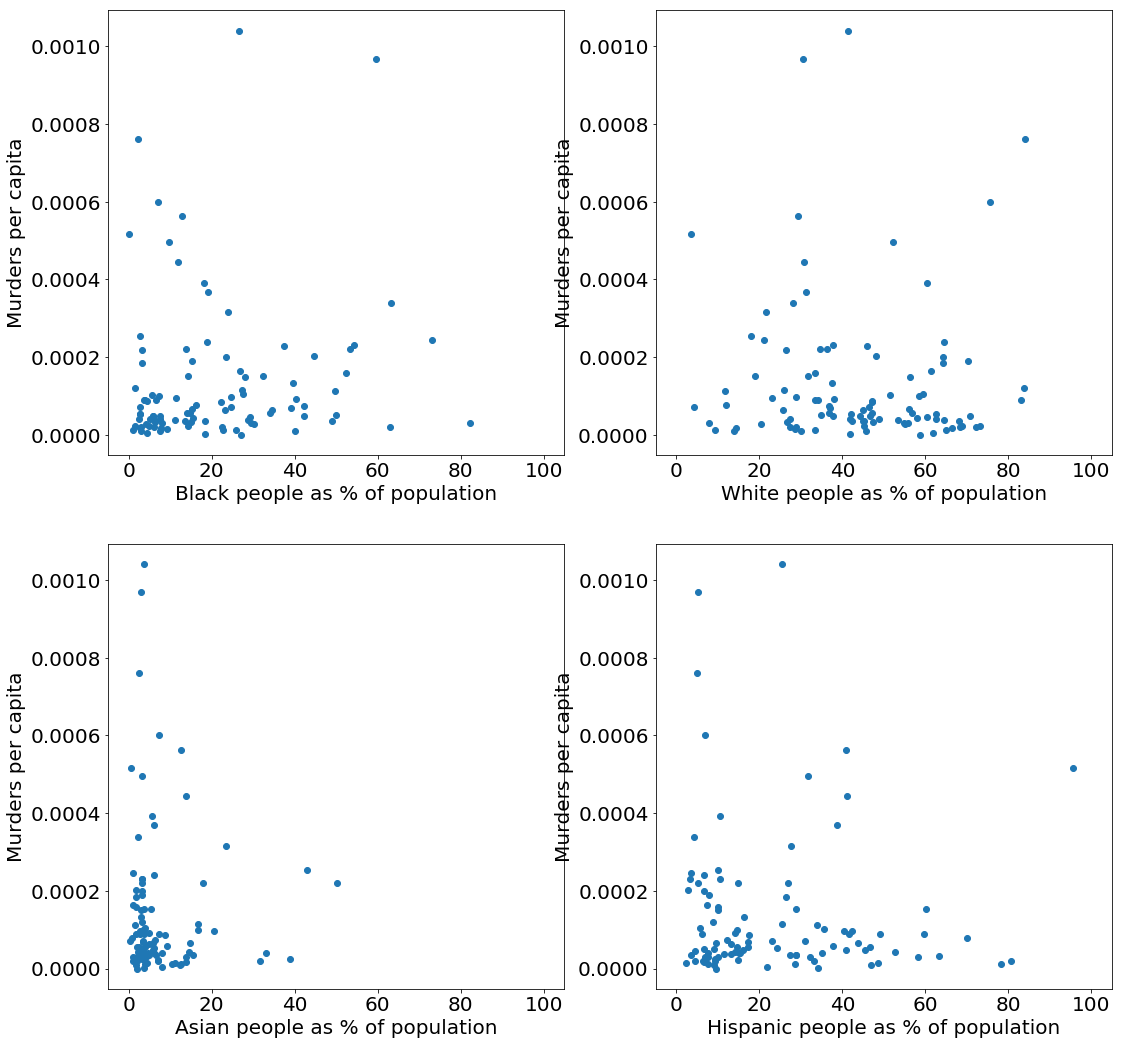

In [117]:
fig=plt.figure(figsize=(18,18))
for i in range(4):
    pplc=names[i]
    ppl_perc=Population[pplc+'_percentage']
    crimes=Crime_density['Murders_per_population']
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(ppl_perc,crimes,'o')
    ax.set_xlabel(pplc+' people as % of population',fontsize=20)
    ax.set_ylabel('Murders per capita',fontsize=20)
    ax.set_xlim([-5,105])
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
plt.show()

So while the violent crime does seem to be correlated with percentage of population that is black, there's no clear correlation when it comes to murders. Once again, the question remains what is the cause. What about the number of arrests?

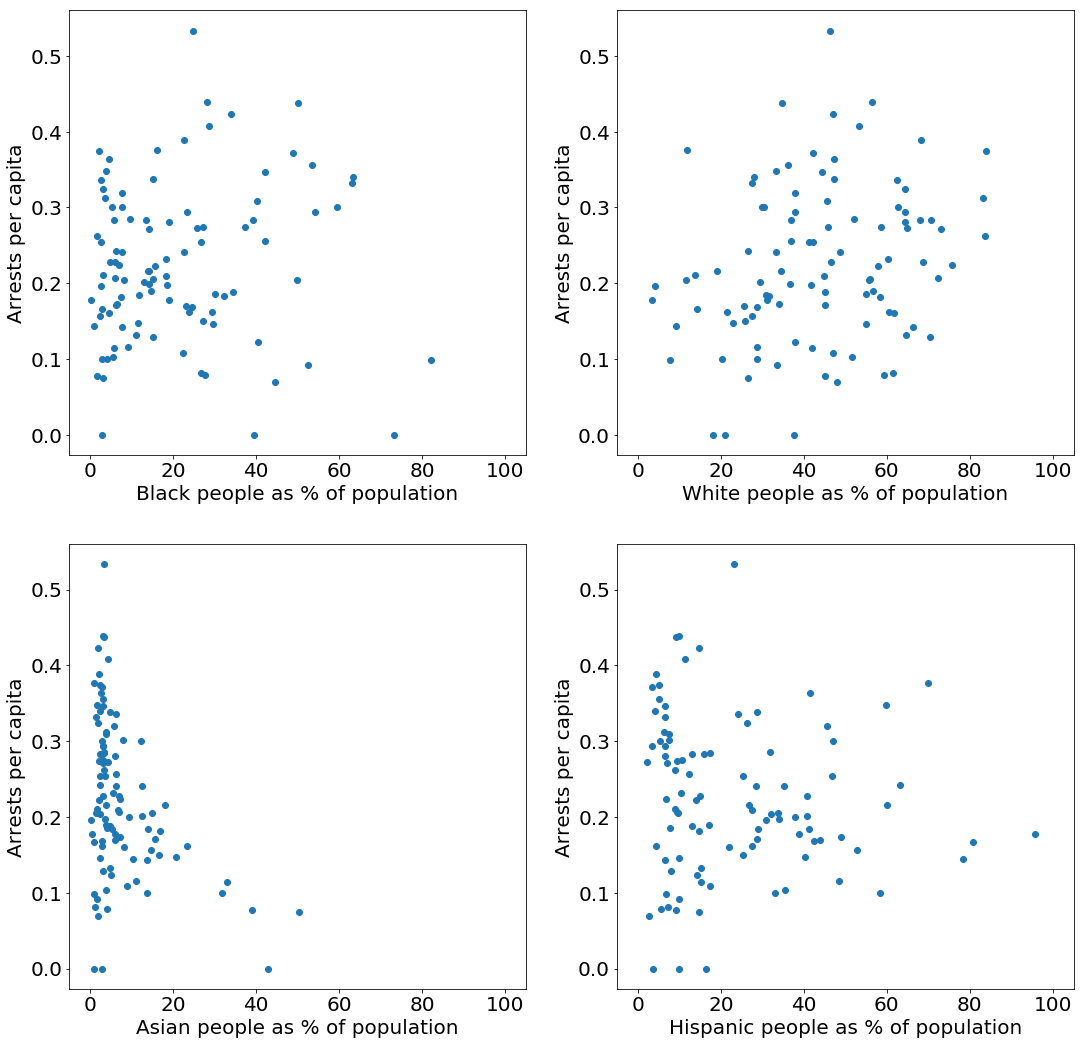

In [118]:
fig=plt.figure(figsize=(18,18))
for i in range(4):
    pplc=names[i]
    ppl_perc=Population[pplc+'_percentage']
    crimes=Crime_density['Arrests_per_population']
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(ppl_perc,crimes,'o')
    ax.set_xlabel(pplc+' people as % of population',fontsize=20)
    ax.set_ylabel('Arrests per capita',fontsize=20)
    ax.set_xlim([-5,105])
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
plt.show()

There seems to be no clear relationship between demographics and rate of arrests. In general, murders seem to be a crime of its own category, quite detached from the rest. For example, we should not expect arrest rate to be correlated with murder rates, but it is expected to be correlated with violent crime rate. This would point to the police not reacting with arrests with regards to changing murder rates. Why?

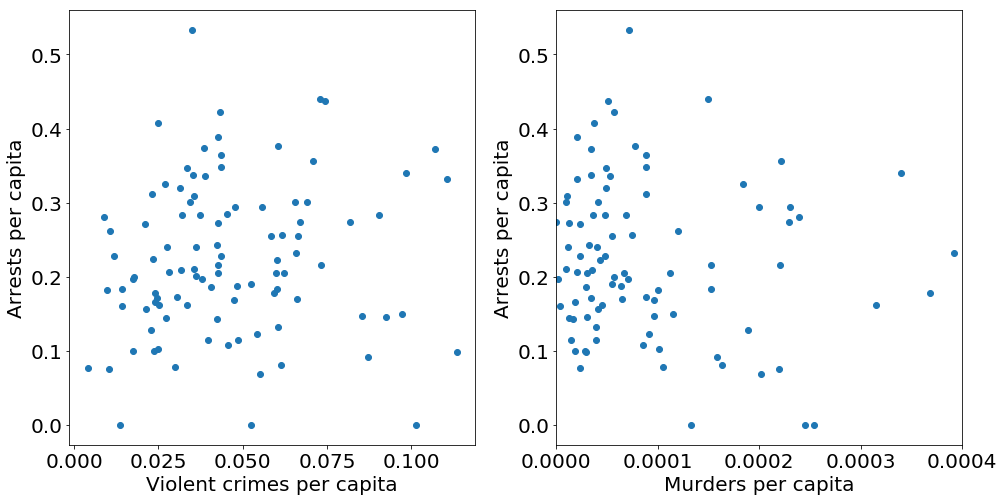

In [123]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
ax.plot(Crime_density['Violent_crimes_per_population'],Crime_density['Arrests_per_population'],'o')
ax.set_ylabel('Arrests per capita',fontsize=20)
ax.set_xlabel('Violent crimes per capita',fontsize=20)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax2=fig.add_subplot(1,2,2)
ax2.plot(Crime_density['Murders_per_population'],Crime_density['Arrests_per_population'],'o')
ax2.set_ylabel('Arrests per capita',fontsize=20)
ax2.set_xlabel('Murders per capita',fontsize=20)
ax2.tick_params(axis='x',labelsize=20)
ax2.tick_params(axis='y',labelsize=20)
ax2.set_xlim((0,0.0004))
plt.show()

What about number of police killings? Does it depend on policing (arrests) or on violent crimes? 

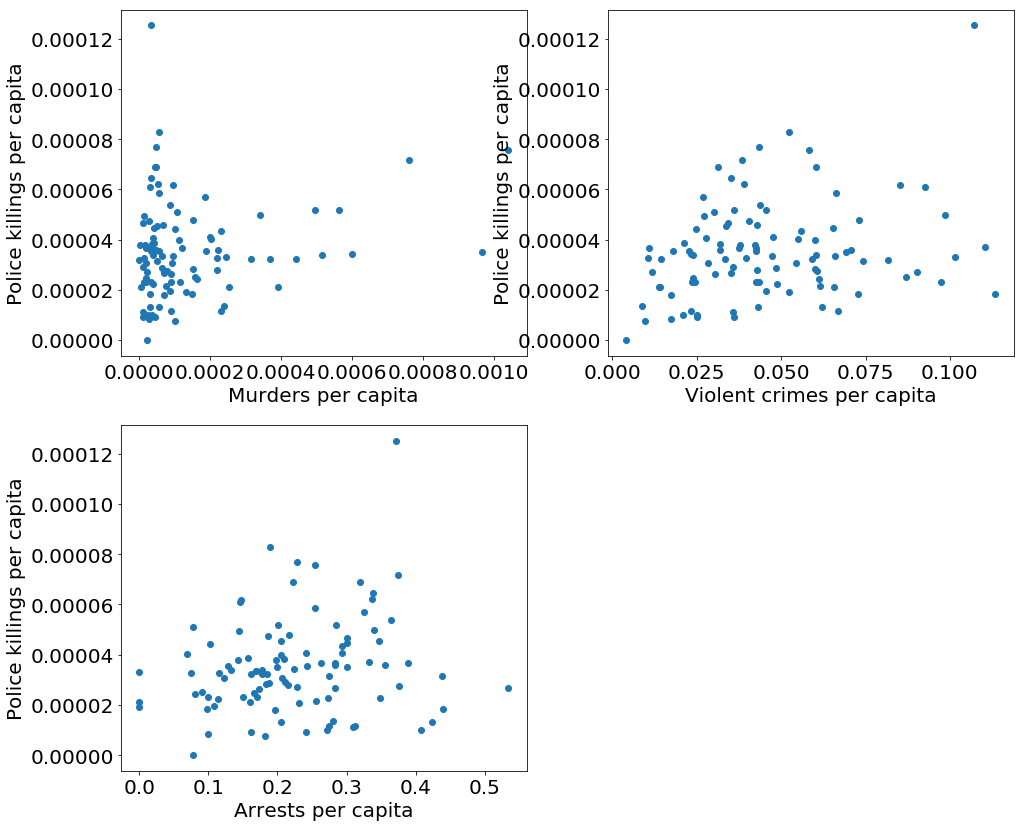

In [10]:
fig=plt.figure(figsize=(16,14))
pol_killings=Deaths['Total_killed_per_population']
for i in range(3):
    crime=Crime_density.iloc[:,i+3]
    xlabel=list(Crime_density.columns)[i+3].replace('_',' ').replace('population','capita')
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(crime,pol_killings,'o')
    ax.set_ylabel('Police killings per capita',fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)
plt.show()

As expected, the rate of police killings is correlated with how intense the policing is (arrests), which in turn is related to violent crimes per capita. However, murders seem not to be correlated with the number of police killings. It could point towards the underlying problem being related to policing methods, not to how dangerous policing is and how fearful the police personel is.

And what are the most dangerous cities? Which city has the biggest arrest rate? And what about police killings?

In [15]:
print('Totals are calculated for years 2013-2018 \n')

Crime_density.sort_values(by=['Violent_crimes_per_population'],ascending=False,inplace=True)
ind=Crime_density.index[0]
print("City with the highest violent crime per capita:")
print("{}, {}".format(Cities['City'].iloc[ind],Cities['State'].iloc[ind]))
print('Violent crime per 1000 people: {}\n'.format(Crime_density['Violent_crimes_per_population'].iloc[0]*1000))

Crime_density.sort_values(by=['Murders_per_population'],ascending=False,inplace=True)
ind=Crime_density.index[0]
print("City with the highest murder per capita:")
print("{}, {}".format(Cities['City'].iloc[ind],Cities['State'].iloc[ind]))
print('Murder per 1000 people: {}\n'.format(Crime_density['Murders_per_population'].iloc[0]*1000))

Crime_density.sort_values(by=['Arrests_per_population'],ascending=False,inplace=True)
ind=Crime_density.index[0]
print("City with the highest arrest per capita:")
print("{}, {}".format(Cities['City'].iloc[ind],Cities['State'].iloc[ind]))
print('Arrest per 1000 people: {}\n'.format(Crime_density['Arrests_per_population'].iloc[0]*1000))

Deaths.sort_values(by=['Total_killed_per_population'],ascending=False,inplace=True)
ind=Deaths.index[0]
print("City with the highest police killing per capita:")
print("{}, {}".format(Cities['City'].iloc[ind],Cities['State'].iloc[ind]))
print('Police killing per 1000 people: {}\n'.format(Deaths['Total_killed_per_population'].iloc[0]*1000))

Totals are calculated for years 2013-2018 

City with the highest violent crime per capita:
Detroit, Michigan
Violent crime per 1000 people: 113.40376616226077

City with the highest murder per capita:
Orlando, Florida
Murder per 1000 people: 1.0407049937054131

City with the highest arrest per capita:
Tampa, Florida
Arrest per 1000 people: 533.3458441686103

City with the highest police killing per capita:
St. Louis, Missouri
Police killing per 1000 people: 0.12527639103772698



c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ip